# Super Market Sales Analysis 

### Team Members:
    
    Shashank Kulkarni - A20542907
    Soham Mankar -

# 

# Data Collection

In [78]:
# Import required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.cluster import KElbowVisualizer
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings



# Styling
%matplotlib inline
from termcolor import colored, cprint
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "cursive"


warnings.filterwarnings('ignore')


In [79]:
#Read the Data in Csv file 
Store=pd.read_csv("Stores.csv")
Store.head()


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [80]:
#Size of Dataframe
Store.shape


(896, 5)

In [81]:
#Checking the info of Dataframe
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [82]:
#Checking the Missing values
Store.isnull().sum()

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

#### There are no Missing values in dataset

In [83]:
#Checking For Duplicates
Store.duplicated().sum()

0

#### There are no Duplicates in data

In [84]:
# Let us drop "Store ID" feature, because as it is index it can be neglected and dropped

Store = Store.iloc[:, 1:]
Store.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [85]:
Store.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

In [86]:
# Let's see top 5 stores with highest sales

highest_sales = pd.DataFrame(Store.nlargest(5, ['Store_Sales']))
highest_sales


,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,1989,2414,860,116320
868,1775,2104,980,105150
432,1365,1638,680,102920
408,1303,1587,1310,102310
758,1486,1758,820,101820


In [87]:
# show the top 5 stores with lowest sales

lowest_sales = pd.DataFrame(Store.nsmallest(5, ['Store_Sales']))
lowest_sales

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,1250,1508,990,14920
852,1477,1790,880,16370
775,1537,1877,660,17670
593,1624,1946,870,20270
352,1397,1686,850,21300


### Insights:
    
 - The store with the highest sales has an area of 1989 and 2414 items available, but there are stores with smaller areas           and fewer items available that still make it into the top 5. This indicates that larger store size or inventory does not             necessarily result in higher sales.
    
    
 - Sales figures for the top stores are concentrated above 100,000, with the top store making significantly more than the             others at 116,320. This could suggest a standout location or strategy that enables higher performance.
    
    
 - Interestingly, the stores with the lowest sales have relatively high daily customer counts, in some cases higher than           those in the top 5. This could indicate inefficiencies in sales conversion or possibly lower average transaction values.
    
    
 - The bottom stores sales figures are less varied than the top stores, ranging from 14,920 to 21,300. This may point to           a consistent challenge faced by these stores in generating higher sales.
    
    

# 

#### Note: Our Target Variable is 'Store_Sales', which indicates Sales in US dollars that stores made

# 

# Exploratory Data Analysis

In [88]:
#Describing the dataframe
Store.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


#### Observations:
    - Maximum Store Area is 2229 and Minimum Store Area is 1485.409598.
    
    - Highest Daily customer count is 1560 on an average over month.
    
    - The minimum daily customer count is 10, which is very low compared to the maximum of 1560. This range suggests that
      some stores are underperforming or could be newly opened, while others are high-traffic.
      
    - On a whole Maximum Store Sale is 116320 and MInimum Sale is 14920.

### Now let's findout correlation between variables

In [89]:
#coorelation matrix

Store.corr()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store_Area,1.000000,0.998891,-0.041423,0.097474
Items_Available,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.097474,0.098849,0.008629,1.000000


<Axes: >

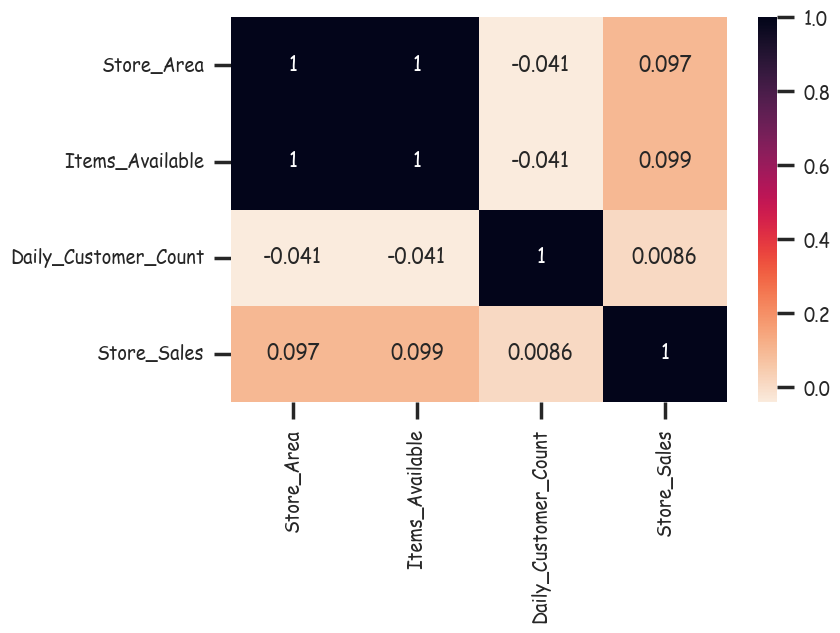

In [90]:
# Let's see the correlation between variables using heatmap

plt.figure(figsize = (8, 5))
sns.heatmap(Store.corr(), annot = True, cmap = 'rocket_r')

#### Insights from above HeatMap

- Store Area and Items avaliable shows strong positive correlationship

- Store area and Items available has a linear relationship

- Store area and Items available has more impact on store sales rather than daily customers

- The correlation coefficients are -0.041 for Store Area/Items Available and Daily Customer Count, which indicates a very weak negative correlation. This implies that the store area and the number of items available have almost no effect on the daily number of customers.

- There is very Weak Positive Correlation Between Store Area/Items Available and Store Sales that is correlation coefficients are 0.097 and 0.099 respectively.

- There is No Correlation Between Daily Customer Count and Store Sales that is the correlation coefficient is 0.0086, which is very close to zero.

### Now Lets check if the Variables of dataset are normally distributed or not 

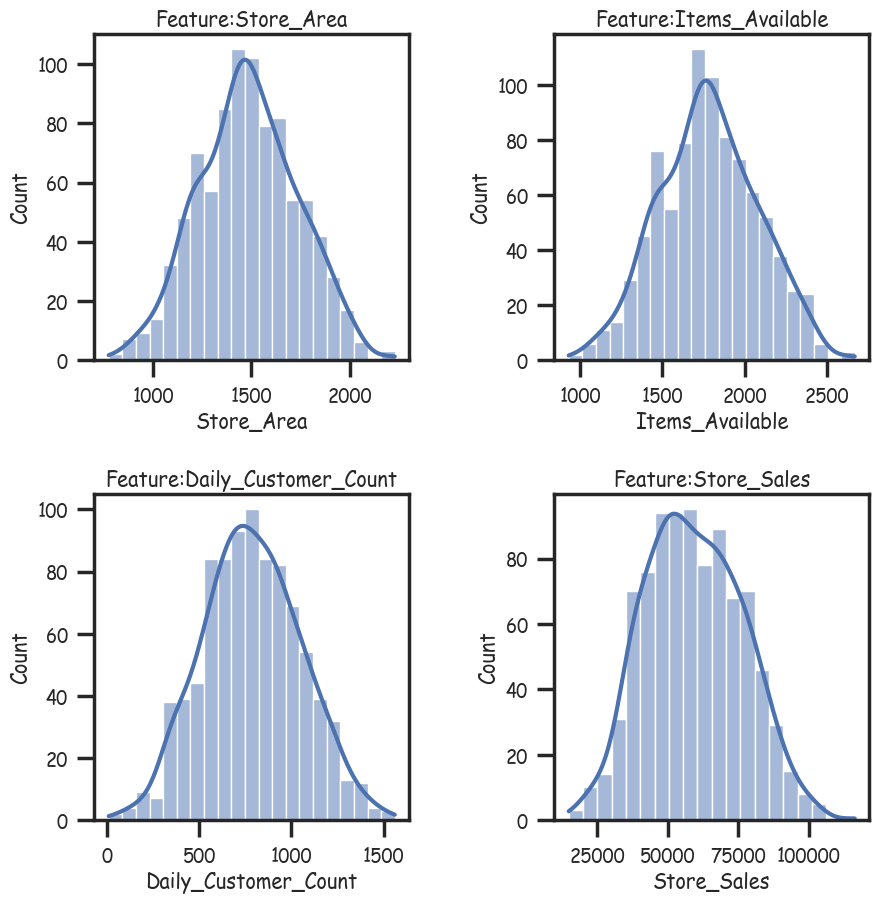

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout(pad=4.0)

features = ['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales']

for f,ax in zip(features,axs.ravel()):
    ax=sns.histplot(ax=ax,data=Store,x=Store[f],kde=True)
    ax.set_title('Feature:'+ f)

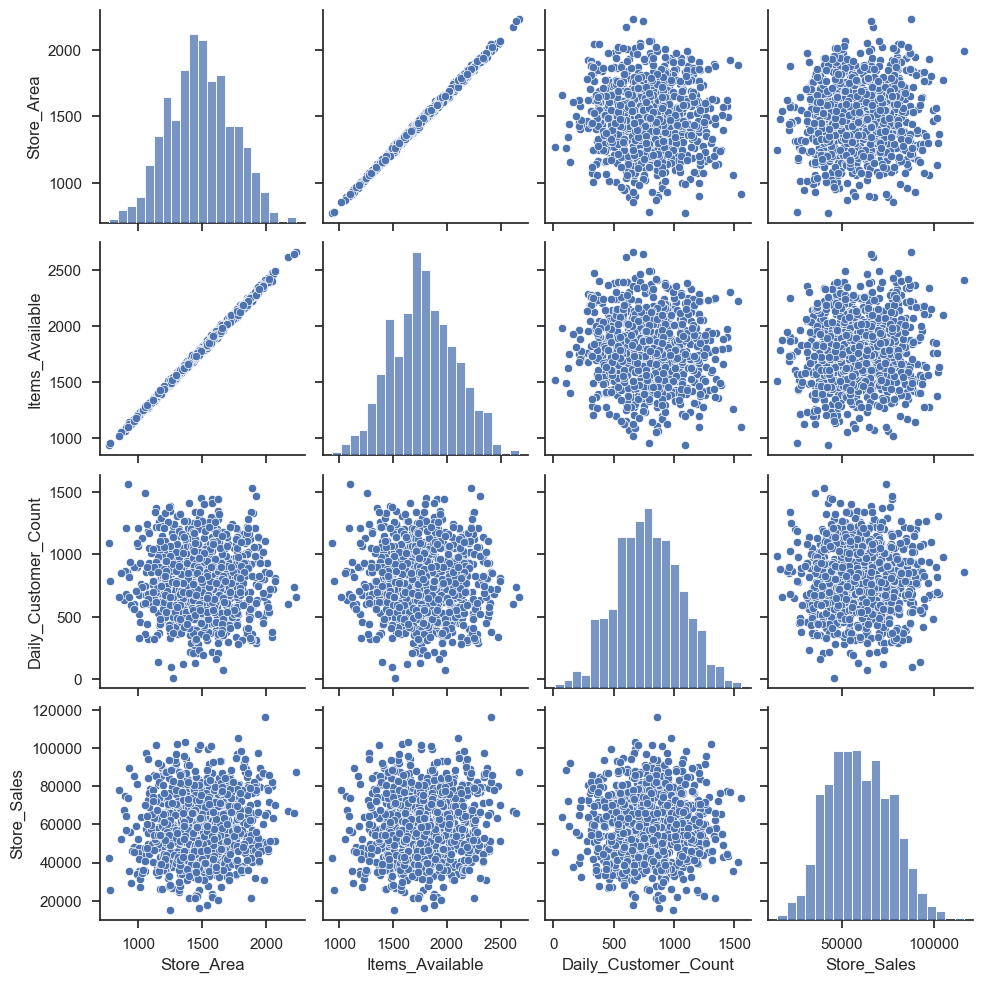

In [92]:
sns.set_theme(style="ticks",palette='deep')
sns.pairplot(Store)

### Insights for above plots:
    
   - The variables Store_Area,Items_avaliable,Daily_customer_count and Store_Sales are "Normally Distributed", with the presence of outliers indicated by the bars at the tails of each histogram
   
   - In the above second plot, the scatter plot for Store Area vs. Items Available shows a clear positive linear relationship, with data points closely aligned along a line. 

### Now lets check for Skewness between all of them:

In [93]:
skew_df = pd.DataFrame(data= Store.columns, columns= ['Features'])
skew_df['Skew'] = skew_df['Features'].apply(lambda feature: skew(Store[feature]))
skew_df['Abs Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Features,Skew,Abs Skew,Skewed
0,Store_Area,0.030316,0.030316,False
1,Items_Available,0.034382,0.034382,False
2,Daily_Customer_Count,0.074508,0.074508,False
3,Store_Sales,0.148544,0.148544,False


#### None of the features or the target variable (assuming one of these is the target for your analysis) show significant skewness. Since all skewness values are well below the threshold of 0.5, this suggests that the data distributions are approximately symmetrical, resembling a normal distribution.Therefore we don't need to apply any kind of transformation

# 

## Now Lets Do some Bi-Variate Analysis

### Let's examine the relationships between our variables by creating a scatter plot.

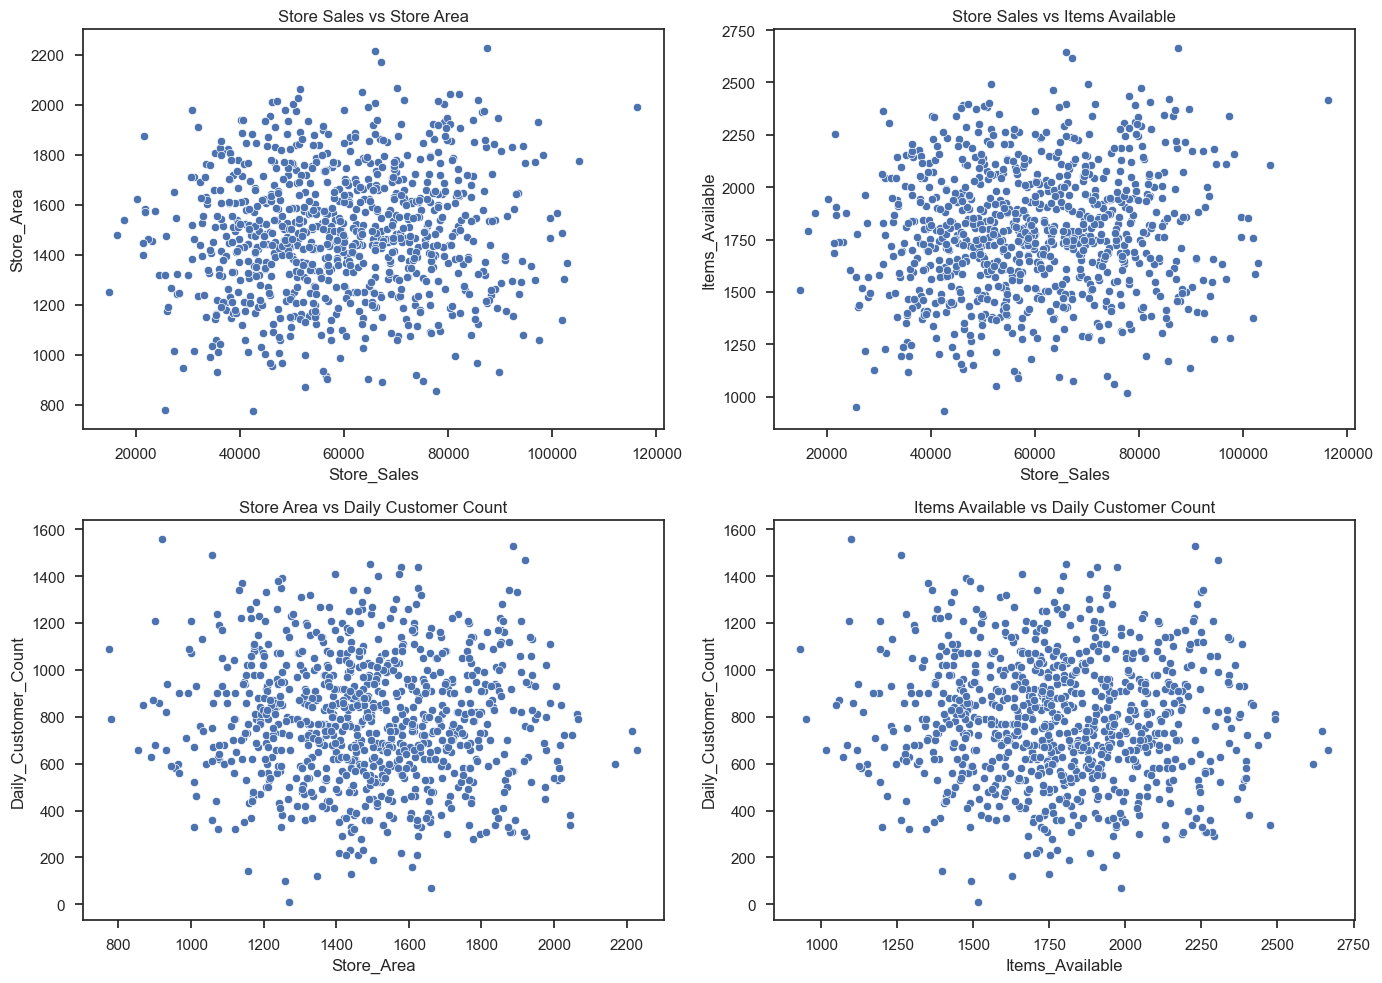

In [94]:


# Create a figure with 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Scatterplot for Store_Sales vs. Store_Area
sns.scatterplot(ax=axes[0], data=Store, x='Store_Sales', y='Store_Area')
axes[0].set_title('Store Sales vs Store Area')

# Scatterplot for Store_Sales vs. Items_Available
sns.scatterplot(ax=axes[1], data=Store, x='Store_Sales', y='Items_Available')
axes[1].set_title('Store Sales vs Items Available')

# Scatterplot for Store_Area vs. Daily_Customer_Count
sns.scatterplot(ax=axes[2], data=Store, x='Store_Area', y='Daily_Customer_Count')
axes[2].set_title('Store Area vs Daily Customer Count')

# Scatterplot for Items_Available vs. Daily_Customer_Count
sns.scatterplot(ax=axes[3], data=Store, x='Items_Available', y='Daily_Customer_Count')
axes[3].set_title('Items Available vs Daily Customer Count')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


#### From the scatter plots, we observe no clear patterns, as the values are mostly clustered around their mean and not easily interpretable. Thus, we will opt for a contour plot for a more detailed analysis.

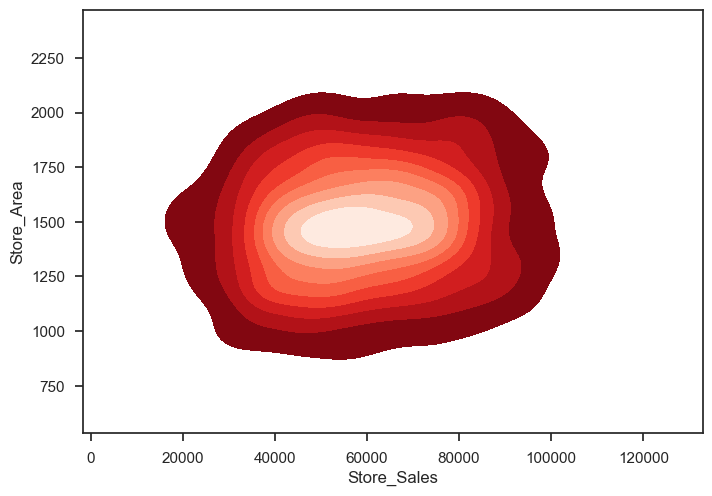

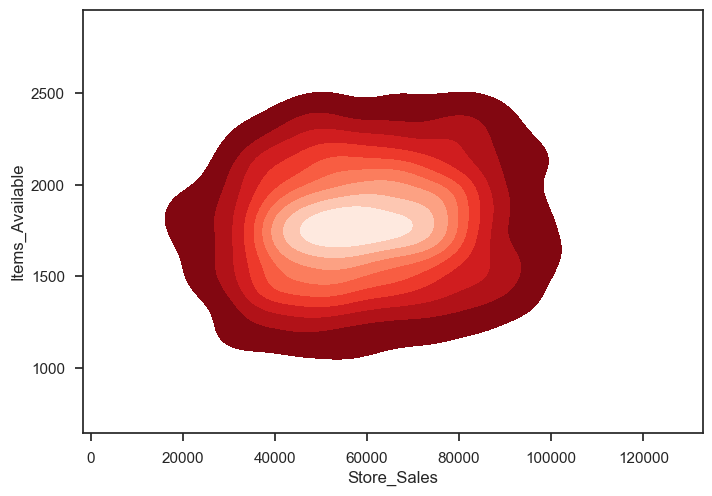

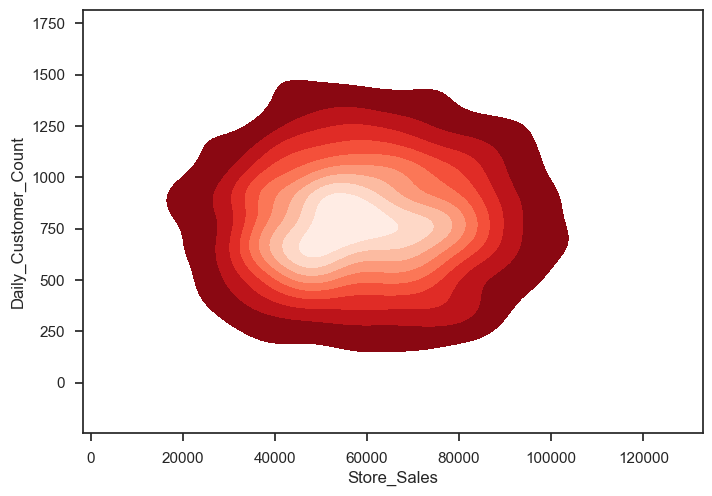

In [95]:


res = sns.kdeplot(x=Store['Store_Sales'], y=Store['Store_Area'], shade=True, cmap="Reds_r")
plt.show()

res = sns.kdeplot(x= Store['Store_Sales'], y= Store['Items_Available'], shade = True, cmap = "Reds_r")
plt.show()

res = sns.kdeplot(x= Store['Store_Sales'], y= Store['Daily_Customer_Count'], shade = True, cmap = "Reds_r")
plt.show()


#### From the three plots related to daily sales, we can deduce that stores with daily sales ranging from 40K to 80K typically share these characteristics:

- The size of the store is usually between 1,250 and 1,750 square feet.
- The number of items available falls within the range of 1,600 to 2,000.
- The daily number of customers is generally between 520 and 1,000.

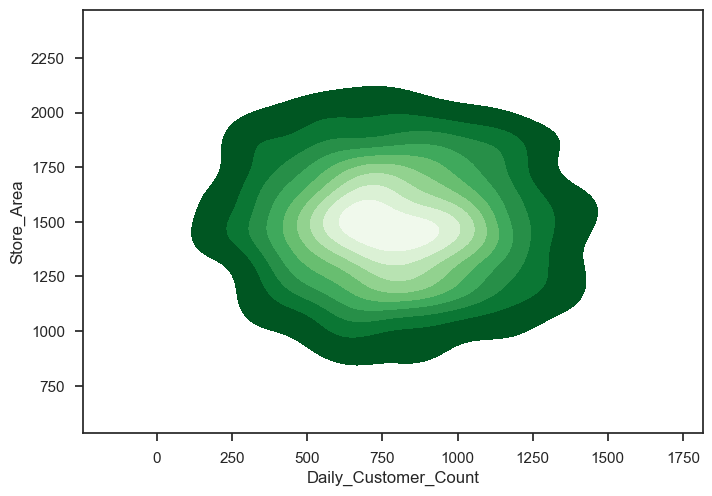

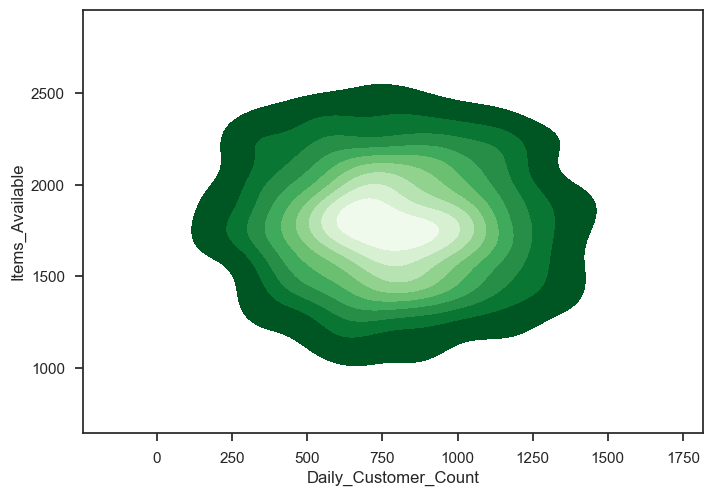

In [96]:
res = sns.kdeplot(x= Store['Daily_Customer_Count'], y=Store['Store_Area'], shade = True, cmap = "Greens_r")
plt.show()
res = sns.kdeplot(x= Store['Daily_Customer_Count'], y=Store['Items_Available'], shade = True, cmap = "Greens_r")
plt.show()

#### From above 2 plots against daily_sales

Stores having daily cusotmers between 510 to 1000 have the following aspects:
- The store size should be between 1250 to 1750.

- The number of items availble should be between 1500 to 2000

# 

## Now lets findout the outliers in the data and if there are any we will remove them

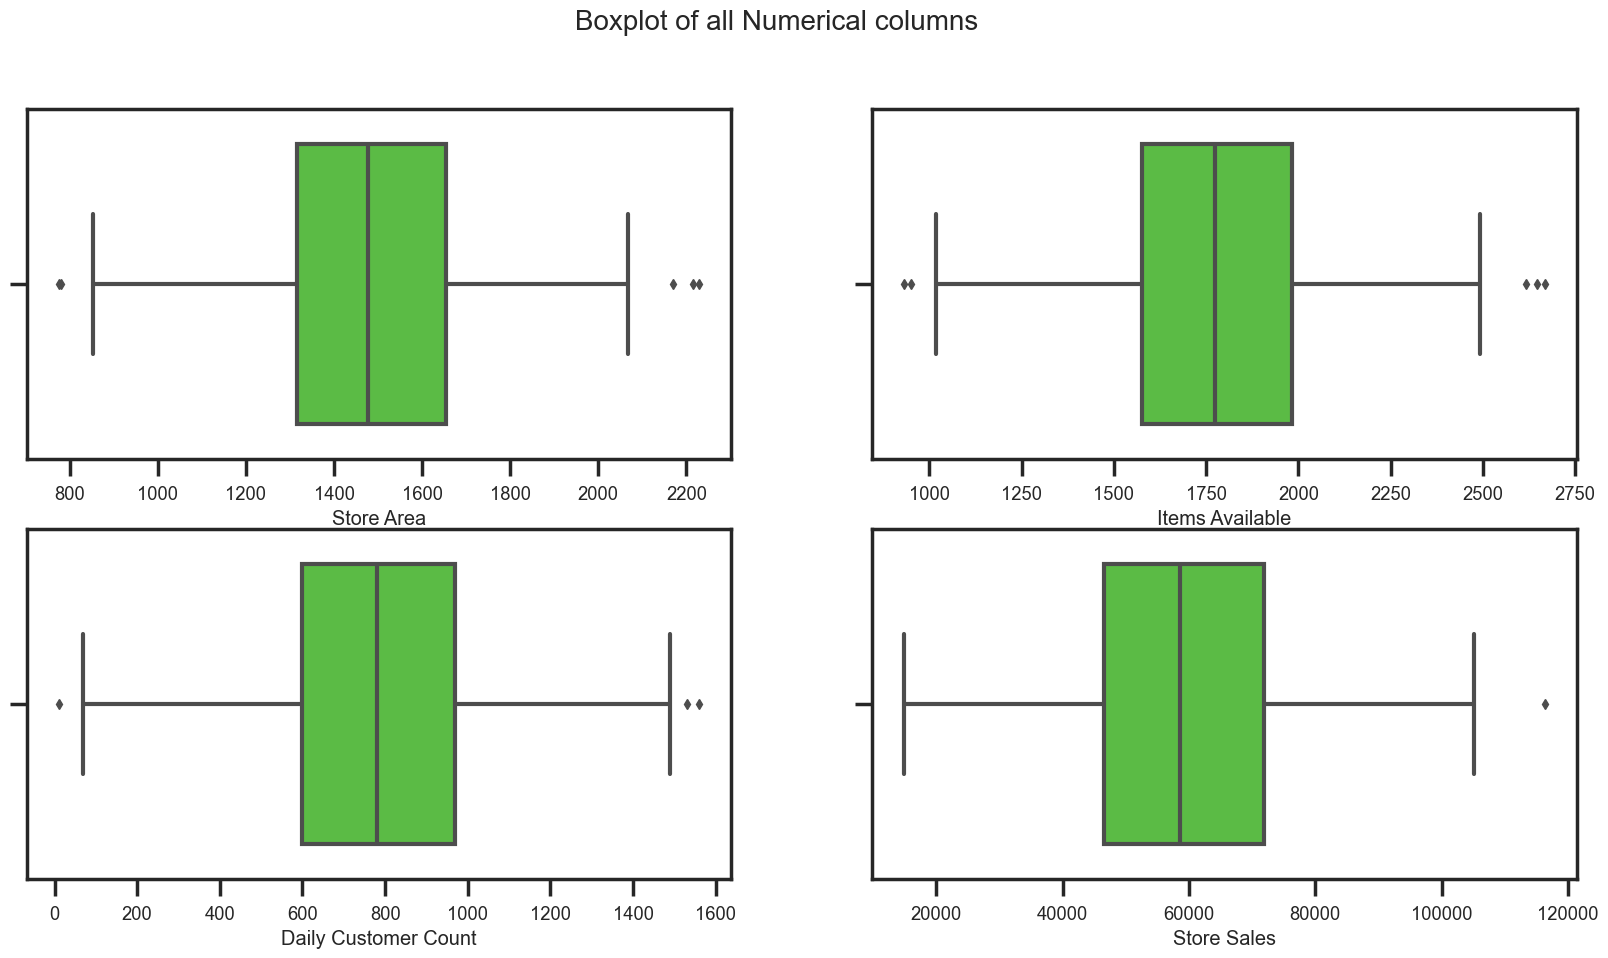

In [97]:
#lets findout if there are any outliers

sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(2, 2, figsize= (20, 10))

plt.suptitle('Boxplot of all Numerical columns', fontsize = 20)

ax1 = sns.boxplot(x = Store['Store_Area'], color= '#4fcf31', ax= ax[0, 0])
ax1.set(xlabel= 'Store Area')

ax2 = sns.boxplot(x = Store['Items_Available'], color= '#4fcf31', ax= ax[0, 1])
ax2.set(xlabel= 'Items Available')

ax3 = sns.boxplot(x = Store['Daily_Customer_Count'], color= '#4fcf31', ax= ax[1, 0])
ax3.set(xlabel= 'Daily Customer Count')

ax4 = sns.boxplot(x = Store['Store_Sales'], color= '#4fcf31', ax= ax[1, 1])
ax4.set(xlabel= 'Store Sales')

plt.show()

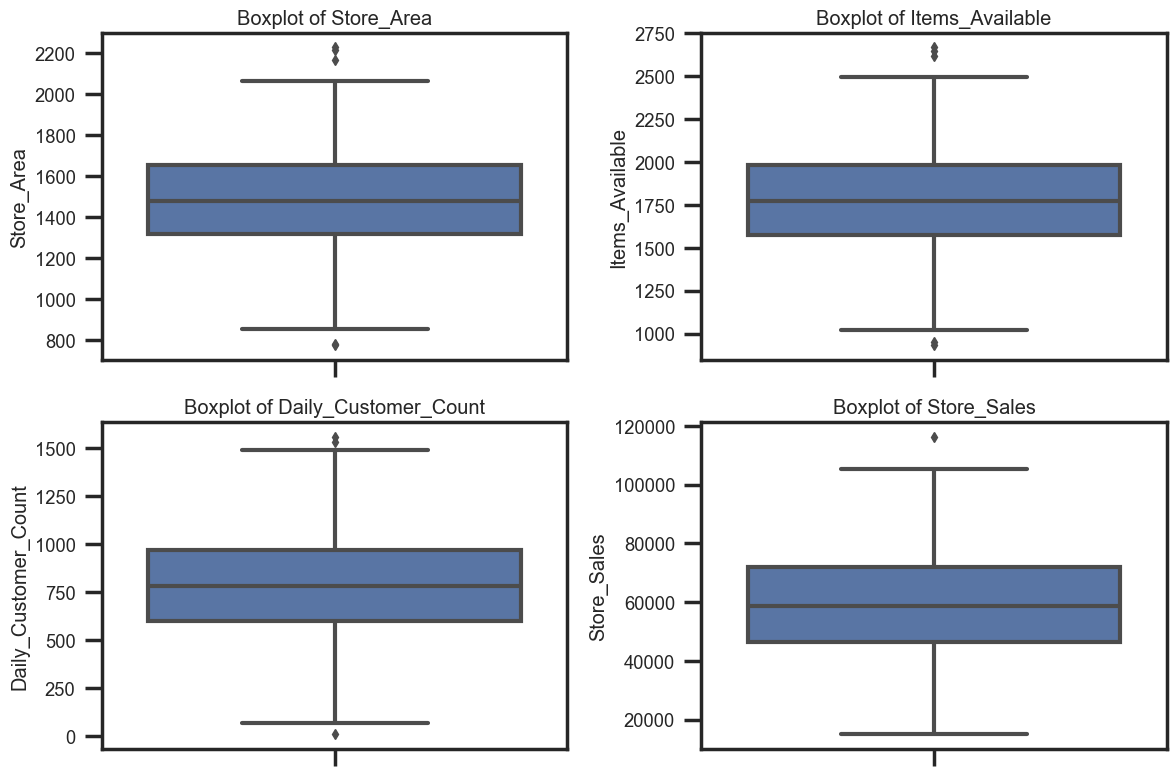

   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0        1659             1961                   530        66490
1        1461             1752                   210        39820
2        1340             1609                   720        54010
3        1451             1748                   620        53730
4        1770             2111                   450        46620


In [98]:
# Function to remove outliers for a specific column
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assume 'Store' is your DataFrame and has been defined with the appropriate data
# Plot boxplots for all columns to visualize outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(Store.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=Store, y=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Remove outliers for each column in the DataFrame
for column in Store.columns:
    Store = remove_outliers(Store, column)

# Reset index after removing outliers
Store.reset_index(drop=True, inplace=True)

# Display the first few rows of the DataFrame with outliers removed
print(Store.head())


# 

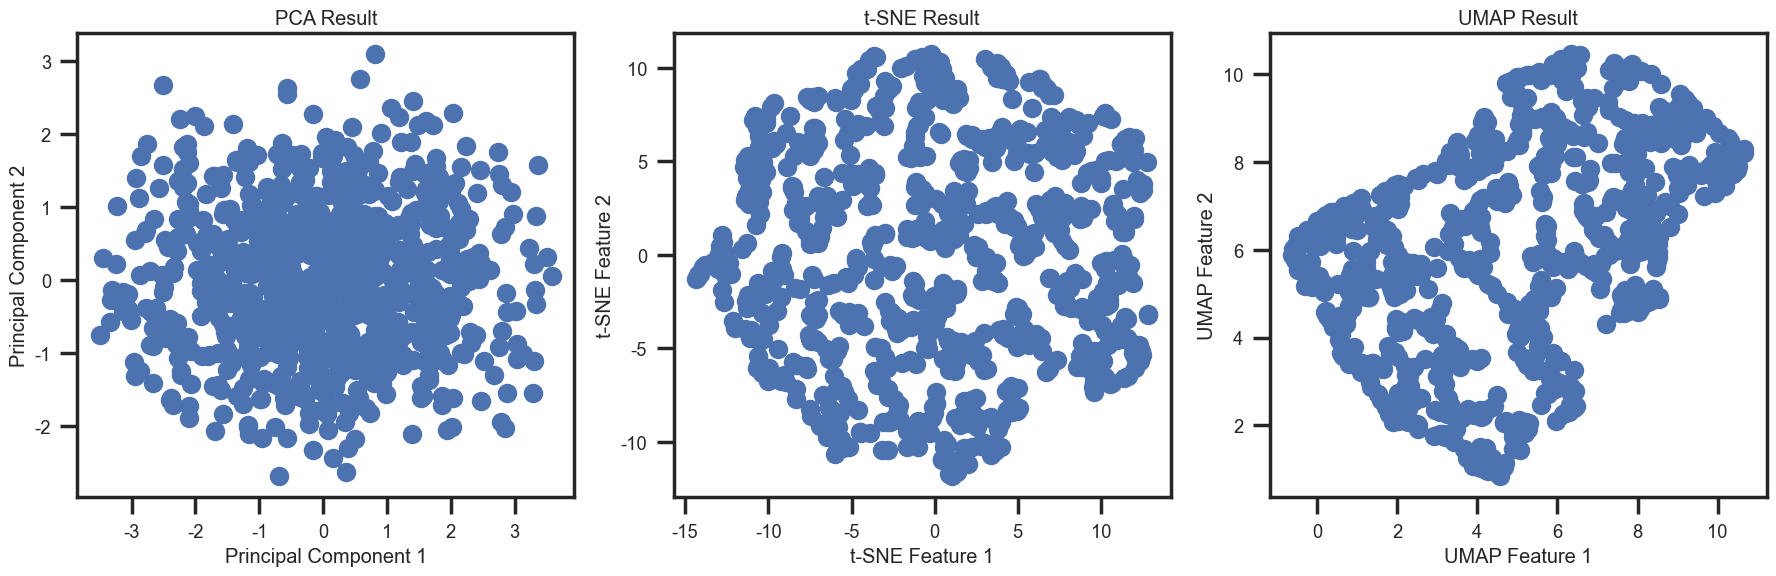

In [99]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap



# Standardizing the data
scaler = StandardScaler()
store_scaled = scaler.fit_transform(Store)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(store_scaled)

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(store_scaled)

# UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_result = umap_model.fit_transform(store_scaled)

# Plotting results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# PCA plot
axs[0].scatter(pca_result[:,0], pca_result[:,1])
axs[0].set_title('PCA Result')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# t-SNE plot
axs[1].scatter(tsne_result[:,0], tsne_result[:,1])
axs[1].set_title('t-SNE Result')
axs[1].set_xlabel('t-SNE Feature 1')
axs[1].set_ylabel('t-SNE Feature 2')

# UMAP plot
axs[2].scatter(umap_result[:,0], umap_result[:,1])
axs[2].set_title('UMAP Result')
axs[2].set_xlabel('UMAP Feature 1')
axs[2].set_ylabel('UMAP Feature 2')

plt.tight_layout()
plt.show()


### Insights:
    
  - PCA (Principal Component Analysis) Result: The PCA plot shows the data projected onto the first two principal components. PCA is a linear dimensionality reduction technique that identifies the axes (principal components) that maximize the variance in the data. The scatter plot is quite dense in the center, suggesting that the variance along these two principal components is relatively spread out, but with no clear separation or clusters of data points.
   

  - t-SNE (t-Distributed Stochastic Neighbor Embedding) Result: The t-SNE plot is much more spread out than the PCA plot, with the data points forming several distinct clusters. t-SNE is a non-linear technique particularly well-suited for visualizing high-dimensional data in two or three dimensions. The separation and formation of clusters suggest that t-SNE is able to capture the local structures and relationships between data points more effectively than PCA for this dataset.
   

  - UMAP (Uniform Manifold Approximation and Projection) Result: The UMAP plot also shows clusters, similar to t-SNE, but with a different structure. UMAP is another non-linear dimensionality reduction technique that is generally faster than t-SNE and often preserves more of the global structure. The clusters in the UMAP plot appear less dense than in the t-SNE plot, indicating that UMAP might be emphasizing both local and global structures of the data.

#### 

# 

# Data preprocessing

### Choosing the Appropriate Features and then splitting into train-test split

In [100]:
feature_cols = ['Store_Area', 'Items_Available', 'Daily_Customer_Count']
X = Store[feature_cols]
y = Store['Store_Sales']

In [101]:
print(X.head())

   Store_Area  Items_Available  Daily_Customer_Count
0        1659             1961                   530
1        1461             1752                   210
2        1340             1609                   720
3        1451             1748                   620
4        1770             2111                   450


In [102]:
print(y.head())

0    66490
1    39820
2    54010
3    53730
4    46620
Name: Store_Sales, dtype: int64


In [103]:
#Splitting into train test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

In [104]:
print(X_test.shape)
print(y_test.shape)


(178, 3)
(178,)


In [105]:
print(X_train.shape)
print(y_train.shape)

(709, 3)
(709,)


###### Note: the above data is for final data after removing outliers

In [107]:
# Standardizing our data for model improvement
sc = StandardScaler()
X = sc.fit_transform(X)

# 

# Data Modeling 

## Data Modeling before Clustering

In [108]:
rfr = RandomForestRegressor(bootstrap = True, max_depth = 90, max_features = 2, min_samples_leaf = 4, min_samples_split = 12, n_estimators = 100)
rfr.fit(X_train, y_train)
r_pred = rfr.predict(X_test)

In [109]:
mse = mean_squared_error(y_test, r_pred)
rmse = np.sqrt(mean_squared_error(y_test, r_pred))
mae = mean_absolute_error(y_test, r_pred)

score = rfr.score(X_train, y_train) 
scores = cross_val_score(rfr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rfr, X_train, y_train, cv=kfold )

In [110]:
print('RandomForest Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

RandomForest Regressor
MSE: 367139314.86
RMSE: 19160.88
MAE: 15859.71
Training score:  0.4084896808828562
Mean cross-validation score: -0.07
K-fold CV average score: -0.09


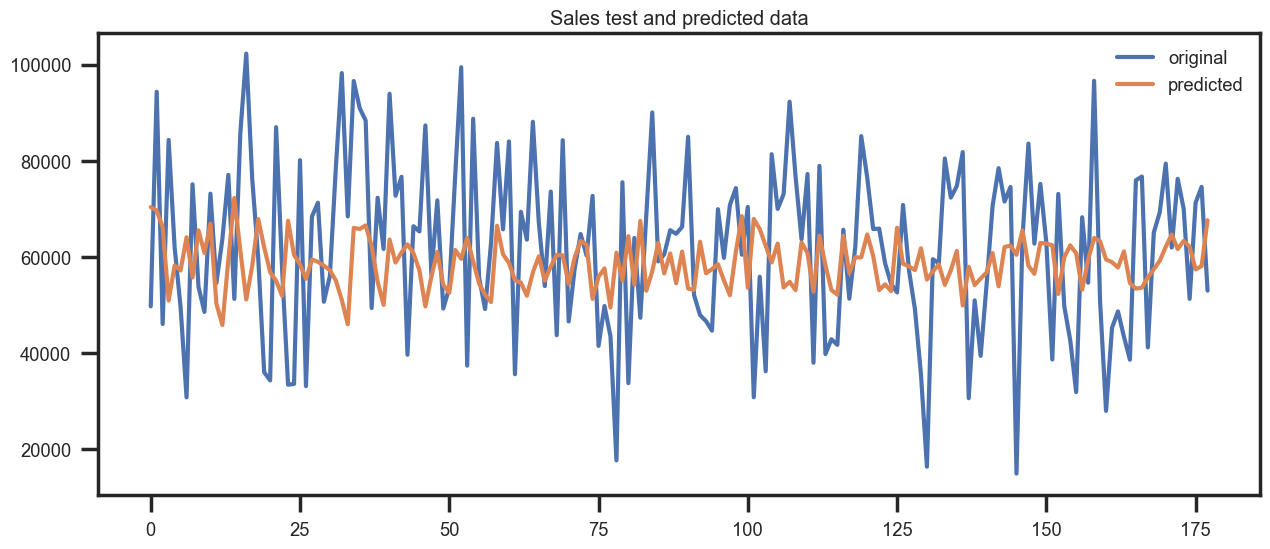

In [111]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, r_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

# Data mining

### We will find the ratio of Store Area , Items and Customers to know the purchasing power of a particular store For that we will make a copy of the original dataset

In [112]:
sales_data_avgs = Store.copy()
sales_data_avgs.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [113]:
sales_data_avgs['ratio_items/cutomers'] = sales_data_avgs['Items_Available']/sales_data_avgs['Daily_Customer_Count']
sales_data_avgs['ratio_size/customers'] = sales_data_avgs['Store_Area']/sales_data_avgs['Daily_Customer_Count']
sales_data_avgs['ratio_size/items']     = sales_data_avgs['Store_Area']/sales_data_avgs['Items_Available']
sales_data_avgs['target_sales'] = Store['Store_Sales']

In [114]:
sales_data_avgs.drop(['Store_Area','Items_Available','Daily_Customer_Count','Store_Sales'],axis = 1, inplace = True)
sales_data_avgs.head()

,ratio_items/cutomers,ratio_size/customers,ratio_size/items,target_sales
0,3.700000,3.130189,0.845997,66490
1,8.342857,6.957143,0.833904,39820
2,2.234722,1.861111,0.832815,54010
3,2.819355,2.340323,0.830092,53730
4,4.691111,3.933333,0.838465,46620


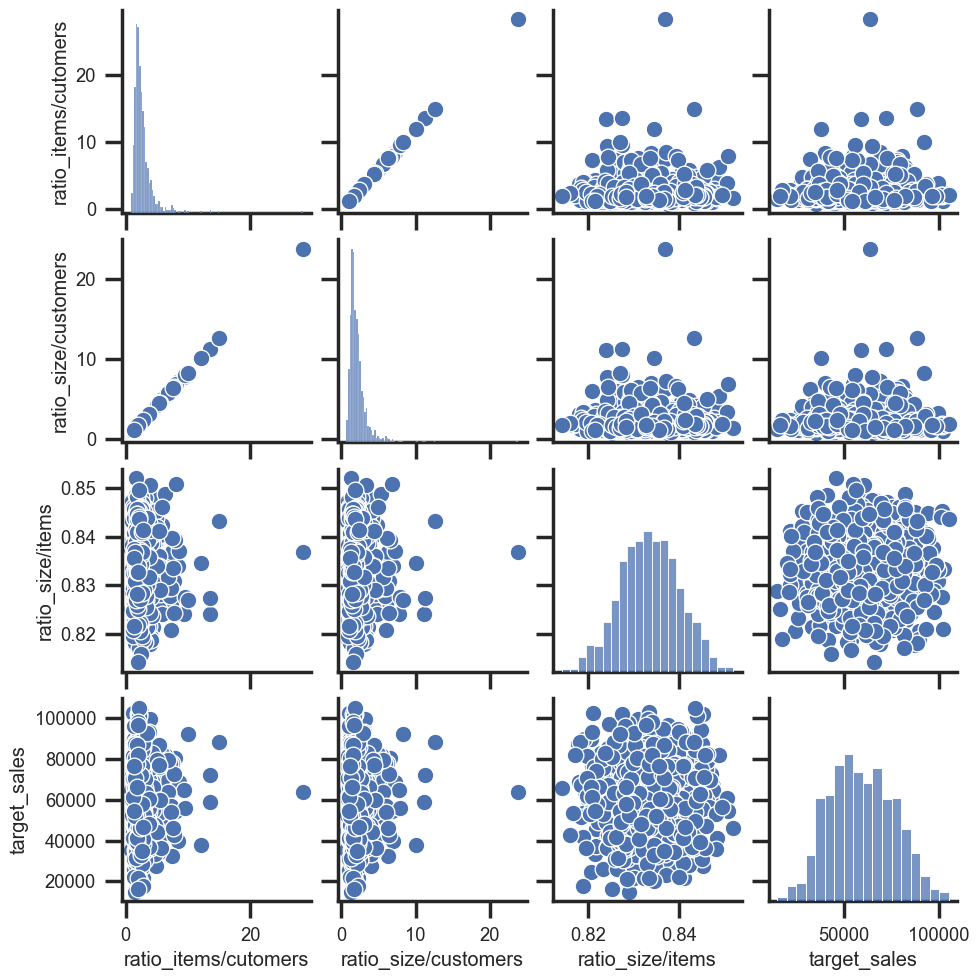

In [115]:
sns.pairplot(data = sales_data_avgs)

Text(0, 0.5, 'Inertia')

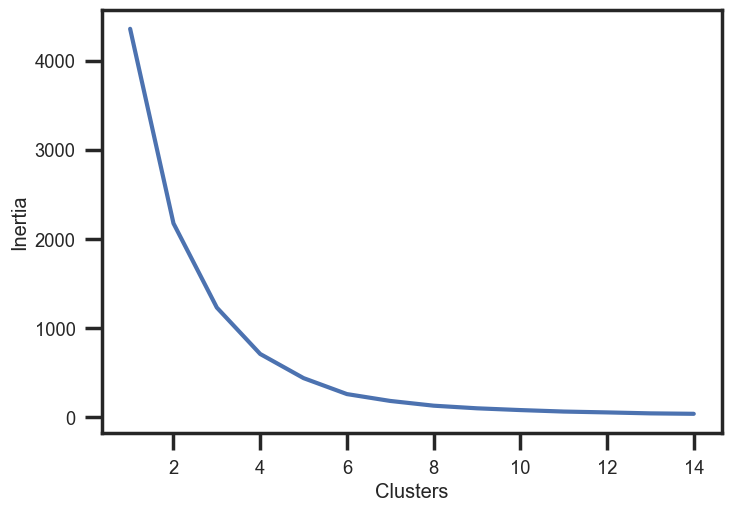

In [116]:
x= sales_data_avgs.drop('target_sales',axis= 1)
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(x)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 15)), y=clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

#### The graph above indicates that the data can be categorized into 10 distinct segments for classifying the purchasing power of customers.

In [117]:
km_10 = KMeans(n_clusters=10).fit(X)
x['Labels'] =km_10.labels_
x.head()

,ratio_items/cutomers,ratio_size/customers,ratio_size/items,Labels
0,3.700000,3.130189,0.845997,3
1,8.342857,6.957143,0.833904,3
2,2.234722,1.861111,0.832815,7
3,2.819355,2.340323,0.830092,6
4,4.691111,3.933333,0.838465,5


In [118]:
y = sales_data_avgs['target_sales']

### Creating group for target sales based on labels

In [119]:
sales_join = x.join(y)
sales_join.columns

Index(['ratio_items/cutomers', 'ratio_size/customers', 'ratio_size/items',
       'Labels', 'target_sales'],
      dtype='object')

Text(0, 0.5, 'Inertia')

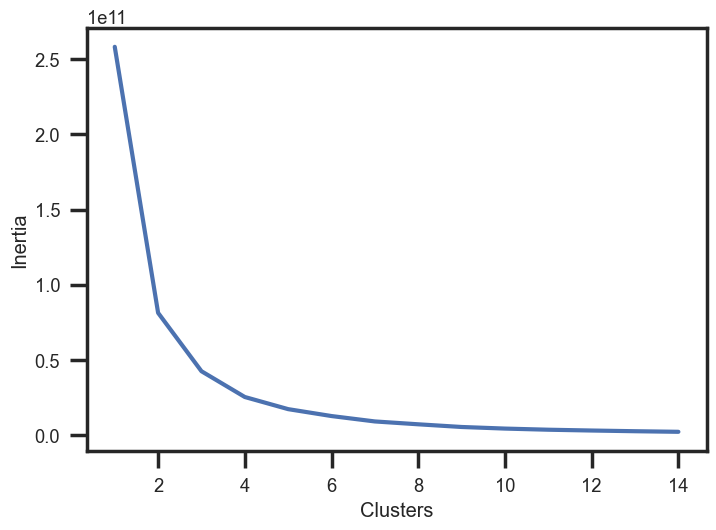

In [120]:
sales_x = sales_join[['Labels','target_sales']]

x1= sales_x
clusters = []

for i in range(1, 15):
    km = KMeans(n_clusters=i).fit(x1)
    clusters.append(km.inertia_)
    
sns.lineplot(x=list(range(1, 15)), y=clusters)
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [121]:
km_10 = KMeans(n_clusters=10).fit(x1)
x['Target_Groups'] =km_10.labels_
x.head()

,ratio_items/cutomers,ratio_size/customers,ratio_size/items,Labels,Target_Groups
0,3.700000,3.130189,0.845997,3,4
1,8.342857,6.957143,0.833904,3,2
2,2.234722,1.861111,0.832815,7,0
3,2.819355,2.340323,0.830092,6,0
4,4.691111,3.933333,0.838465,5,5


## Data Modeling after clustering

### Used 6 models with 10 FOLD cross validation for model comparison:

- LinearRegression
- DecisionTreeRegressor
- XGBRegressor
- LGBMRegressor
- CatBoostRegressor
- RandomForestRegressor

Used StandardScaler() for scaling.

Evaluation metrics: mae, mse, rmse, R2_score

In [122]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

### Linear Regression

In [123]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred =lr.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
mae = mean_absolute_error(y_test, lr_pred)

score = lr.score(X_train, y_train) 
scores = cross_val_score(lr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  lr_pred)

In [125]:
print('Linear Regression')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Linear Regression
MSE: 318572744.29
RMSE: 17848.61
MAE: 14601.07
Training score:  0.041948082718560764
Mean cross-validation score: 0.02
K-fold CV average score: 0.01
R_score : 0.00


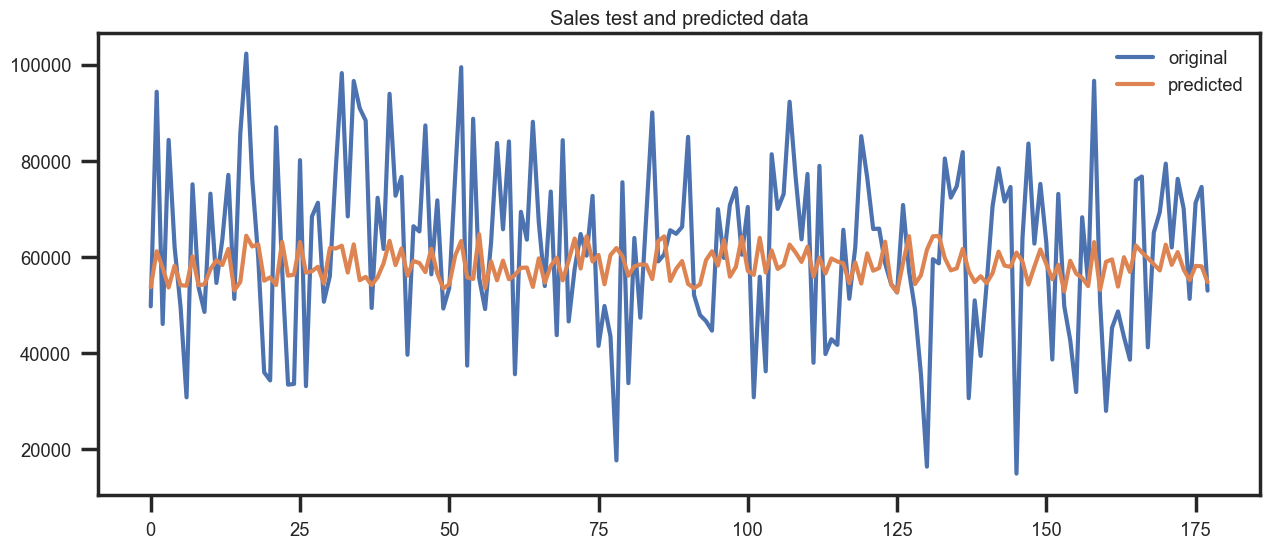

In [126]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lr_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

## Decision Tree Regressor

In [127]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred =dtr.predict(X_test)

In [128]:
mse = mean_squared_error(y_test, dtr_pred)
rmse = np.sqrt(mean_squared_error(y_test, dtr_pred))
mae = mean_absolute_error(y_test, dtr_pred)

score = dtr.score(X_train, y_train) 
scores = cross_val_score(dtr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(dtr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  dtr_pred)

In [129]:
print('DecisionTree Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

DecisionTree Regressor
MSE: 11689135.96
RMSE: 3418.94
MAE: 2743.71
Training score:  1.0
Mean cross-validation score: 0.97
K-fold CV average score: 0.96
R_score : 0.96


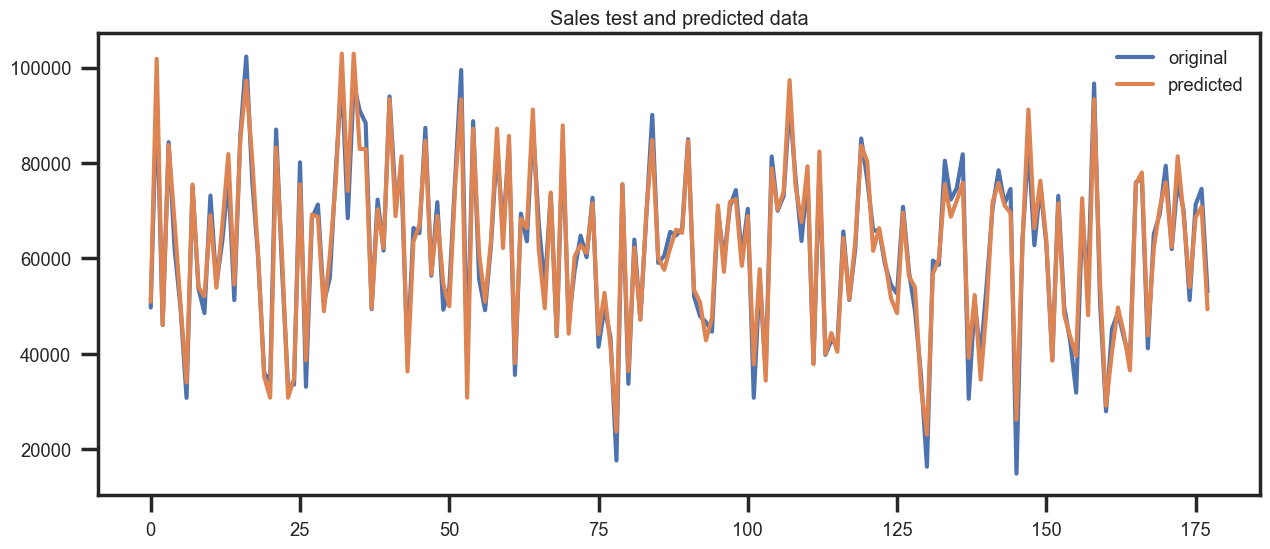

In [130]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, dtr_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

## XGB Regressor

In [131]:
xgbr = XGBRegressor(random_state = 116)
xgbr.fit(X_train, y_train)
xgbr_pred =xgbr.predict(X_test)

In [132]:
mse = mean_squared_error(y_test, xgbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgbr_pred))
mae = mean_absolute_error(y_test, xgbr_pred)

score = xgbr.score(X_train, y_train) 
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  xgbr_pred)

In [133]:
print('XGB Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

XGB Regressor
MSE: 8604659.08
RMSE: 2933.37
MAE: 2350.13
Training score:  0.9997613323344052
Mean cross-validation score: 0.98
K-fold CV average score: 0.98
R_score : 0.97


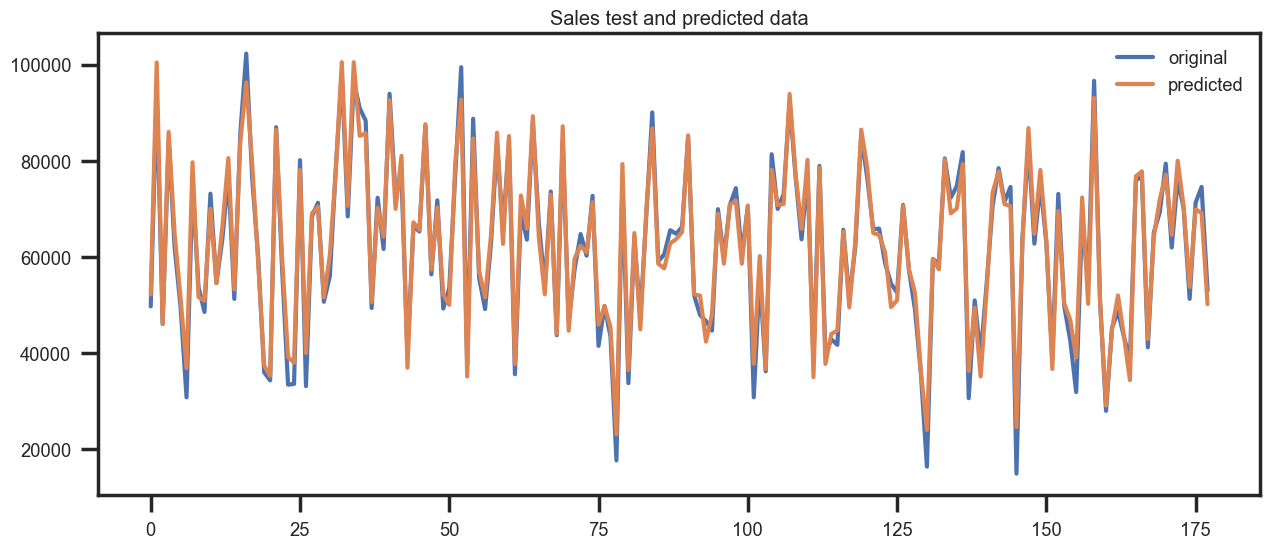

In [134]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, xgbr_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

## LGBM Regressor

In [135]:
lgbr = lgb.LGBMRegressor(random_state = 116)
lgbr.fit(X_train, y_train)
lgbr_pred =lgbr.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 709, number of used features: 5
[LightGBM] [Info] Start training from score 58643.004231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [136]:
mse = mean_squared_error(y_test, lgbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, lgbr_pred))
mae = mean_absolute_error(y_test, lgbr_pred)

score = lgbr.score(X_train, y_train) 
scores = cross_val_score(lgbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lgbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  lgbr_pred)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 638, number of used features: 5
[LightGBM] [Info] Start training from score 58521.598746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train se

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 638, num

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 638, number of used features: 5
[LightGBM] [Info] Start training from score 58593.228840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 659
[LightGBM] [Info] Number of data points in the train set: 638, number of used features: 5
[LightGBM] [Info] Start training from score 58377.601881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [137]:
print('LGBM Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

LGBM Regressor
MSE: 15922775.70
RMSE: 3990.34
MAE: 2740.94
Training score:  0.9891386919150305
Mean cross-validation score: 0.96
K-fold CV average score: 0.97
R_score : 0.95


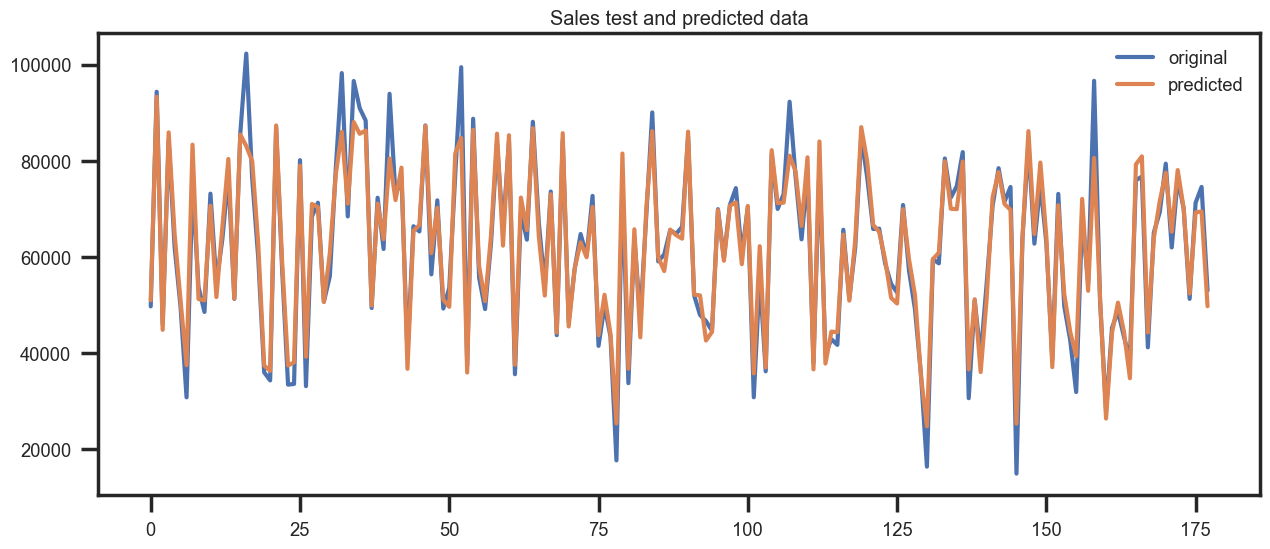

In [138]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lgbr_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

## CatBoost Regressor

In [139]:
cbr = CatBoostRegressor(random_state =116, verbose = 0)
cbr.fit(X_train, y_train)
cbr_pred =cbr.predict(X_test)

In [140]:
mse = mean_squared_error(y_test, cbr_pred)
rmse = np.sqrt(mean_squared_error(y_test, cbr_pred))
mae = mean_absolute_error(y_test, cbr_pred)

score = cbr.score(X_train, y_train) 
scores = cross_val_score(cbr, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(cbr, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  cbr_pred)

In [141]:
print('CatBoost Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

CatBoost Regressor
MSE: 8475040.18
RMSE: 2911.19
MAE: 2230.96
Training score:  0.9946199015628391
Mean cross-validation score: 0.98
K-fold CV average score: 0.98
R_score : 0.97


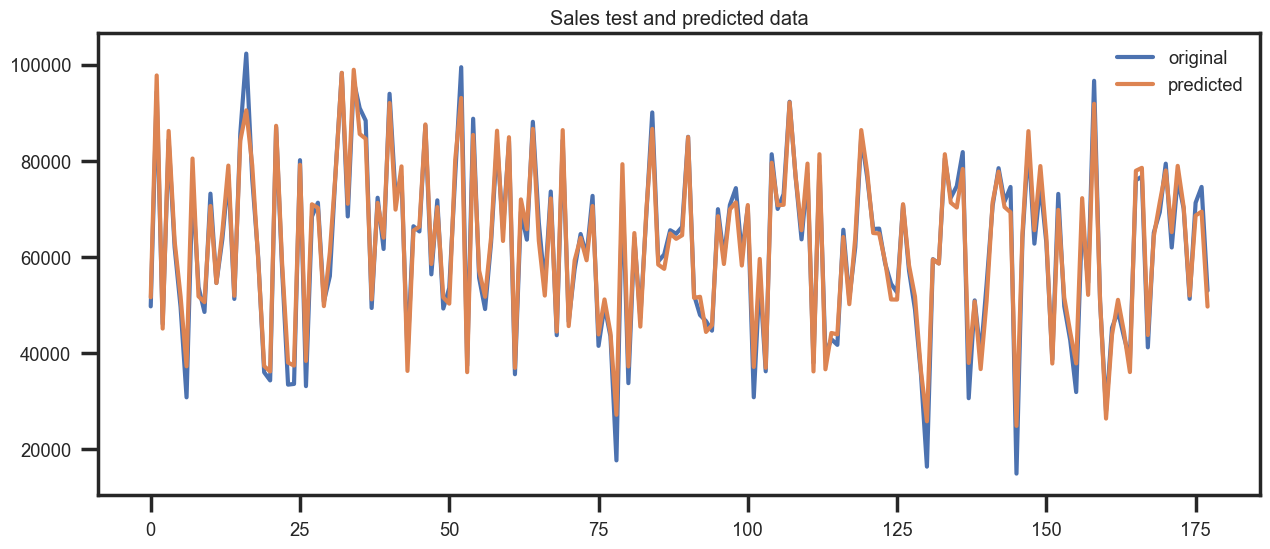

In [142]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, cbr_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

## Random Forest Regressor

In [143]:
rf = RandomForestRegressor(random_state = 116)
rf.fit(X_train, y_train)
rf_pred =rf.predict(X_test)

In [144]:
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
mae = mean_absolute_error(y_test, rf_pred)

score = rf.score(X_train, y_train) 
scores = cross_val_score(rf, X_train, y_train,cv=10)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(rf, X_train, y_train, cv=kfold )
r2 =r2_score(y_test,  rf_pred)

In [145]:
print('Random Forest Regressor')
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (rmse))
print("MAE: %.2f" % (mae))
print("Training score: ", score)
print("Mean cross-validation score: %.2f" % scores.mean())
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())
print("R_score : %.2f"%(r2))

Random Forest Regressor
MSE: 7483788.00
RMSE: 2735.65
MAE: 2180.03
Training score:  0.9971731777993457
Mean cross-validation score: 0.98
K-fold CV average score: 0.98
R_score : 0.98


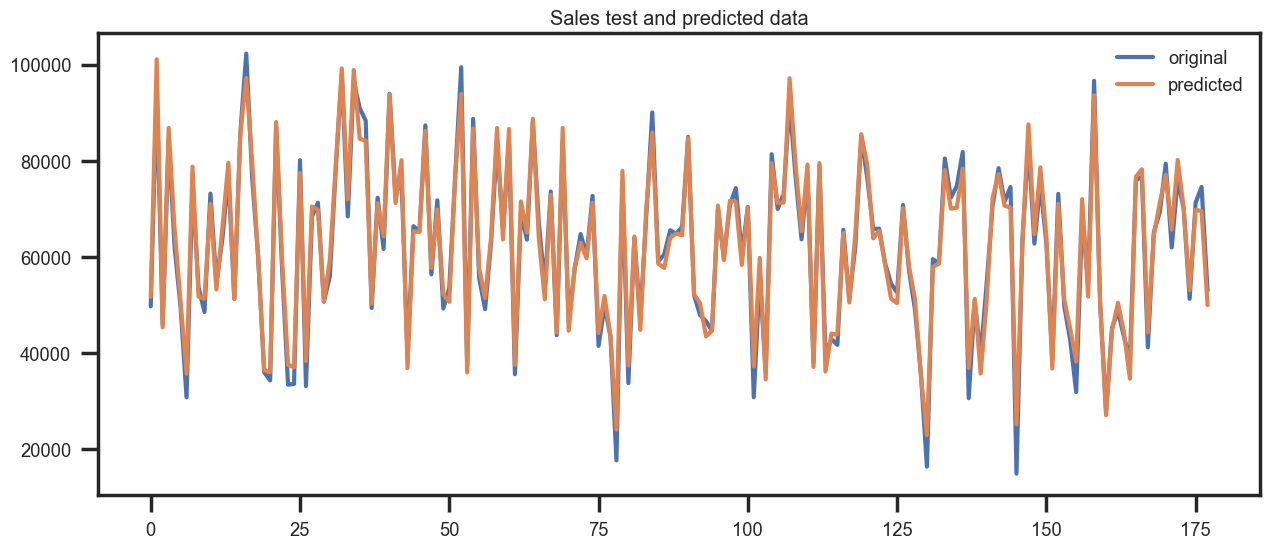

In [146]:
plt.figure(figsize = (15, 6))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, rf_pred, label="predicted")
plt.title("Sales test and predicted data")
plt.legend()
plt.show()

In [147]:
# parameters
class PARAM:
    FOLD = 10
    RANDOM_STATE = 116
    VERBOSE = 0
    
# scaling function
def Scaler(train_X, val_X):
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(train_X)
    scaled_val = scaler.transform(val_X)
    return scaled_train, scaled_val

# define models
xgbr = XGBRegressor(random_state = PARAM.RANDOM_STATE)
lgbr = lgb.LGBMRegressor(random_state = PARAM.RANDOM_STATE)
cbr = CatBoostRegressor(random_state = PARAM.RANDOM_STATE, verbose = PARAM.VERBOSE)
rf = RandomForestRegressor(random_state = PARAM.RANDOM_STATE)
dtr = DecisionTreeRegressor()
lr = LinearRegression()

classifiers_name = ['XGBRegressor','LGBMRegressor','CatBoostRegressor','RandomForestRegressor','DecisionTreeRegressor','LinearRegression']
color_sequence = ['red','blue','green','grey','cyan','yellow']
classifiers = [xgbr, lgbr, cbr, rf, dtr, lr]
mae_score = []
mse_score = []
rmse_score = []
R2_score = []

fold = KFold(n_splits=PARAM.FOLD, shuffle=True, random_state=PARAM.FOLD)

# 10 fold
for idx, classifier in enumerate(classifiers):
    mae = 0  
    mse = 0
    rmse = 0
    r2score = 0
    print(colored('Classifier:',color_sequence[idx]) ,colored(classifiers_name[idx],color_sequence[idx]), '\n\n')
    for fold_idx, (train_idx, val_idx) in enumerate(fold.split(X, y)):
        
        x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
        x_train, x_val = Scaler(x_train, x_val)
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model = classifier.fit(x_train, y_train)
        val_preds = model.predict(x_val)
        
        mae += mean_absolute_error(y_val, val_preds) / PARAM.FOLD
        mse += mean_squared_error(y_val,val_preds) / PARAM.FOLD
        rmse += np.sqrt(mean_squared_error(y_val, val_preds)) / PARAM.FOLD
        r2score += r2_score(y_val,val_preds)/PARAM.FOLD
        
        print('Fold','{',fold_idx+1,'} ','\n\n')
        print('MAE Score: ', mean_absolute_error(y_val, val_preds))
        print('MSE Score: ', mean_squared_error(y_val,val_preds))
        print('RMSE Score: ', np.sqrt(mean_squared_error(y_val, val_preds)))
        print('R2 Score: ', r2_score(y_val,val_preds),'\n\n')
        
    mae_score.append(round(mae,2))
    mse_score.append(round(mse,2))
    rmse_score.append(round(rmse,2))
    R2_score.append(round(r2score,2))
    print('---'*20,'\n')

Classifier: XGBRegressor 


Fold { 1 }  


MAE Score:  2377.7997059339887
MSE Score:  7972730.594164687
RMSE Score:  2823.6024143219397
R2 Score:  0.9694662169149917 


Fold { 2 }  


MAE Score:  2061.5131012991574
MSE Score:  7658561.5517744
RMSE Score:  2767.4106221835605
R2 Score:  0.9764864008982871 


Fold { 3 }  


MAE Score:  2159.3321629213483
MSE Score:  6756747.863916633
RMSE Score:  2599.374513977667
R2 Score:  0.9721802381536961 


Fold { 4 }  


MAE Score:  2199.980710147472
MSE Score:  7515080.367149482
RMSE Score:  2741.3646906512604
R2 Score:  0.9770804756580733 


Fold { 5 }  


MAE Score:  2293.8180960323034
MSE Score:  7457415.372147593
RMSE Score:  2730.826866014686
R2 Score:  0.9749022419747705 


Fold { 6 }  


MAE Score:  2056.6407786165732
MSE Score:  6398226.230038975
RMSE Score:  2529.4715317708115
R2 Score:  0.9782502575639076 


Fold { 7 }  


MAE Score:  2212.2197375351125
MSE Score:  8098023.023336732
RMSE Score:  2845.702553559794
R2 Score:  0.97727599582

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fold { 3 }  


MAE Score:  1939.2064247711148
MSE Score:  4951548.703240672
RMSE Score:  2225.20756408041
R2 Score:  0.9796128391248446 


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 798, number of used features: 5
[LightGBM] [Info] Start training from score 59270.476190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fold { 7 }  


MAE Score:  2027.359317636871
MSE Score:  6867760.750227186
RMSE Score:  2620.641286064765
R2 Score:  0.9807282563281813 


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 799, num

Fold { 10 }  


MAE Score:  1835.8204710195243
MSE Score:  4770502.35607347
RMSE Score:  2184.147970278907
R2 Score:  0.9805057891937184 


------------------------------------------------------------ 

Classifier: CatBoostRegressor 


Fold { 1 }  


MAE Score:  2311.0442295585835
MSE Score:  7422178.339177645
RMSE Score:  2724.367511768125
R2 Score:  0.9715747094737445 


Fold { 2 }  


MAE Score:  2041.4105306309461
MSE Score:  7026916.718985621
RMSE Score:  2650.833212215665
R2 Score:  0.9784257002396135 


Fold { 3 }  


MAE Score:  1967.119228305162
MSE Score:  5087759.482584933
RMSE Score:  2255.6062339391005
R2 Score:  0.9790520143732666 


Fold { 4 }  


MAE Score:  2079.986774309041
MSE Score:  6431175.51185916
RMSE Score:  2535.976244340463
R2 Score:  0.9803861733354732 


Fold { 5 }  


MAE Score:  2029.698915013466
MSE Score:  5880773.177544397
RMSE Score:  2425.0305518785526
R2 Score:  0.9802083946185278 


Fold { 6 }  


MAE Score:  1937.6692645110438
MSE Score:  5266602.

# Model Comparison

### Compare R2 Score of 5 regression models below:

In [148]:
fig = px.bar(x = classifiers_name,
             y = R2_score,
             text = R2_score,
             template = "simple_white",
             color = classifiers_name,
             color_discrete_sequence = px.colors.qualitative.Antique)

fig.update_layout(template = 'simple_white', title = 'R2 Score Comparison')

fig.update_layout(
    xaxis_title="Models",
    yaxis_title="R2_Score",
    font = dict(size=17, family = 'Franklin Gothic'))


fig.data[2].marker.line.width = 3
fig.data[2].marker.line.color='black'
    
fig.show()

#### Observations:

- The R2 score is a measure of how well the variations in the dependent variable can be explained by the independent variables in a regression model. A higher R2 score indicates a better fit.

- XGBRegressor, LGBMRegressor, CatBoostRegressor, and RandomForestRegressor all have the same R2 scores of 0.98, which is very close to 1, indicating an excellent fit.

- DecisionTreeRegressor has a slightly lower R2 score of 0.96, which is still considered very good.

- LinearRegression has a significantly lower R2 score of 0.02, which indicates a poor fit.

### Our 'CatBoostRegressor' model got the highest R2_Score.¶


#### And RMSE Score Comparison:



In [149]:
fig = px.line(x = classifiers_name,
             y = rmse_score,
             text = rmse_score,
             template = "simple_white",)

fig.update_layout(template = 'simple_white', title = 'RMSE Score Comparison')

fig.update_layout(
    xaxis_title="Models",
    yaxis_title="RMSE_Score",
    font = dict(size=17, family = 'Franklin Gothic'))

fig.show()

#### Observations:

- RMSE is a measure of the average magnitude of the errors between the predicted values from the model and the actual values. A lower RMSE indicates better performance.

- The RMSE scores for XGBRegressor, LGBMRegressor, CatBoostRegressor, and RandomForestRegressor are relatively low and quite close to each other, ranging from 2452.75 to 2656.17.

- DecisionTreeRegressor has a higher RMSE of 3247.01, indicating that the average error of the predictions is greater.

- LinearRegression has an extremely high RMSE of 16762.13, which indicates very poor predictive performance.

# 

### Which Model is Best?

#### Based on the R2 score, all models except LinearRegression perform excellently, with no clear winner. However, when considering the RMSE, which gives us an idea about the error magnitude, XGBRegressor has the lowest RMSE, followed closely by LGBMRegressor, CatBoostRegressor, and RandomForestRegressor.

#### Considering both metrics together, XGBRegressor might be the best model due to its high R2 score and the lowest RMSE. However, the choice of the best model can also depend on other factors such as the complexity of the model, the time it takes to train, and the nature of the data. Additionally, the very high performance of multiple models could indicate that the problem is relatively straightforward or that the data might not be challenging enough to differentiate the models' performance. It's also worth considering whether the models are overfitting given the extremely high R2 scores.

# 

# 

# Prediction

#### As we analyse in above model comparison, XGB regressor  might be the best model due to its high R2 score and the lowest RMSE.So let us Predict new values with the help of XGB regressor model


#### 

In [159]:
import xgboost as xgb


# Calculate the mean and standard deviation for each feature
mean_area = Store['Store_Area'].mean()
std_area = Store['Store_Area'].std()
mean_items = Store['Items_Available'].mean()
std_items = Store['Items_Available'].std()
mean_customers = Store['Daily_Customer_Count'].mean()
std_customers = Store['Daily_Customer_Count'].std()

# Generate synthetic data for 10 new stores
np.random.seed(42)  # For reproducibility
synthetic_store_area = np.random.normal(mean_area, std_area, 10).astype(int)
synthetic_items_available = np.random.normal(mean_items, std_items, 10).astype(int)
synthetic_daily_customer_count = np.random.normal(mean_customers, std_customers, 10).astype(int)

# Ensure all synthetic values are positive (assuming all these features are positive)
synthetic_store_area = np.abs(synthetic_store_area)
synthetic_items_available = np.abs(synthetic_items_available)
synthetic_daily_customer_count = np.abs(synthetic_daily_customer_count)

# Create a DataFrame with the synthetic data
synthetic_data = pd.DataFrame({
    'Store_Area': synthetic_store_area,
    'Items_Available': synthetic_items_available,
    'Daily_Customer_Count': synthetic_daily_customer_count
})

# Train the XGBRegressor model on the entire dataset
X = Store[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = Store['Store_Sales']
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X, y)

# Predict the Store_Sales for the synthetic data points
predicted_sales = xgb_model.predict(synthetic_data)

# Output the synthetic data and corresponding predicted sales
synthetic_data['Predicted_Store_Sales'] = predicted_sales
print(synthetic_data)


   Store_Area  Items_Available  Daily_Customer_Count  Predicted_Store_Sales
0        1609             1643                  1175           72063.234375
1        1450             1642                   726           61706.707031
2        1647             1854                   804           85229.179688
3        1866             1208                   408           56729.183594
4        1426             1264                   641           46995.015625
5        1426             1613                   815           63984.796875
6        1880             1478                   480           63182.167969
7        1677             1876                   886           39656.636719
8        1367             1509                   626           26926.189453
9        1621             1358                   708           45364.246094


##### The Above is 10 predicted Store Sales values for the Dataset Stores.csv

#### Observations:
    
    - Theres a significant range in the predicted sales, indicating that the model can differentiate well between various store scenarios.

    - Higher daily customer counts seem to correspond to higher predicted sales, which suggests that customer count is a strong predictor in the model.

    - The relationship between store area, items available, and sales is not clearly linear, which is expected given the complexity usually captured by gradient boosting models like XGBRegressor.

# 

# 